In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/git_colab/LLM_prc

/content/drive/MyDrive/git_colab/LLM_prc


In [ ]:
! git config --global user.email "ehan3993@gmail.com"
! git config --global user.name "newhione"

In [ ]:
! git add .

In [ ]:
! git commit -m "add file"

[main bfc763a] add file
 3 files changed, 3 insertions(+), 1 deletion(-)
 create mode 100644 commit.ipynb
 rewrite llm_01.ipynb (90%)
 create mode 100644 llm_02.ipynb


In [ ]:
! git push

Enumerating objects: 12, done.
Counting objects: 100% (12/12), done.
Delta compression using up to 2 threads
Compressing objects: 100% (11/11), done.
Writing objects: 100% (11/11), 297.97 KiB | 3.97 MiB/s, done.
Total 11 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), done.
remote: error: GH013: Repository rule violations found for refs/heads/main.
remote: 
remote: - GITHUB PUSH PROTECTION
remote:   —————————————————————————————————————————
remote:     Resolve the following violations before pushing again
remote: 
remote:     - Push cannot contain secrets
remote: 
remote:     
remote:      (?) Learn how to resolve a blocked push
remote:      https://docs.github.com/code-security/secret-scanning/working-with-secret-scanning-and-push-protection/working-with-push-protection-from-the-command-line#resolving-a-blocked-push
remote:     
remote:     
remote:       —— GitHub Personal Access Token ——————————————————————
remote:        locations:
remote:        

# 문장 토큰화
- 기본로직
  - 마침표, 느낌표, 물음표를 문장 끝 후보로 인식
  - 약어 패턴 학습(Dr,Mr,U.S.A 등)
  - 대문자로 시작하는지 확인
  - 통계적 모델을 사용해 진짜 문장 경계인지 판단
- 다국어
- 약어와 실제 문장 끝을 구분하는 기계학습 모델 내장

# 단어 토큰화 word_tokenization
- 규칙 기반
  - 공백을 기준으로 단어분리
  - 구두점을 별도 토큰으로 분리
  - 축약형 처리 (it's -> it,s)
  - 소유격 처리 ("Let's" -> Let, s)
- 구두점 기반 WordPunctTokenizer
  - 모든 구두점을 분리
  - It's -> It, ', s
- 정규 표현식 RegexpTokenizer
- 노이즈와 불용어 제거 (학습에 필요하지 않은 단어들)
  - set 자료구조: 중복제거
  - List Comprehension: 필터링
  - NLTK 불용어 사전
  




In [ ]:
import nltk

# punkt 데이터 다운로드
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
nltk.download('wordnet')
nltk.download('webtext')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# 문장 토큰화
from nltk.tokenize import sent_tokenize

In [ ]:
sentence = "Hello everyone. It's good to see you. Let's start our text mining class."
sent_tokenize(sentence)

['Hello everyone.',
 "It's good to see you.",
 "Let's start our text mining class."]

In [ ]:
sentence_kor = '안녕하세요, 여러분. 만나서 반갑습니다. 이제 학습을 시작해 볼까요?'
sent_tokenize(sentence_kor)

['안녕하세요, 여러분.', '만나서 반갑습니다.', '이제 학습을 시작해 볼까요?']

In [ ]:
# 단어 토큰화
from nltk.tokenize import word_tokenize

word_tokenize(sentence_kor)

['안녕하세요', ',', '여러분', '.', '만나서', '반갑습니다', '.', '이제', '학습을', '시작해', '볼까요', '?']

In [ ]:
# WordPunctTokenizer: 구두점을 별도로 분
from nltk.tokenize import WordPunctTokenizer

WordPunctTokenizer().tokenize(sentence)

['Hello',
 'everyone',
 '.',
 'It',
 "'",
 's',
 'good',
 'to',
 'see',
 'you',
 '.',
 'Let',
 "'",
 's',
 'start',
 'our',
 'text',
 'mining',
 'class',
 '.']

In [ ]:
# 정규식 토큰화
import re

re.findall('[abc]', 'how are you?') #abc중 문장에서 찾으면 반환

[]

In [ ]:
# 노이즈와 불용어 제거
from nltk.corpus import stopwords

english_stops = stopwords.words('english')
test1 = "Sorry, I couldn't go to movie yesterday."
tokens = word_tokenize(test1)

[ token for token in tokens if token not in english_stops ] #토큰이 english_stops에만 속하지 않을 때, 토큰을 가져오기

['Sorry', ',', 'I', 'could', "n't", 'go', 'movie', 'yesterday', '.']

In [ ]:
from nltk.tokenize import RegexpTokenizer

english_stops = stopwords.words('english')
test1 = "Sorry, I couldn't go to movie yesterday."

RegexpTokenizer("[//w]+")
tokens = tokenizer.tokenize(test1.lower())

[ token for token in tokens if token not in english_stops ] #토큰이 english_stops에만 속하지 않을 때, 토큰을 가져오기

NameError: name 'tokenizer' is not defined

In [ ]:
# 소문자 a~z로 이루어진 문자열에서 4글자 이상
RegexpTokenizer("[a-z]{4,}")
RegxeepTokenizer("[//w]{3,}") #3글자 이상
RegxeepTokenizer("[//w]") #어포스트로피를 패턴에서 제외 (can't -> can t)

# 정규화 기법
## 어간 추출(Steaming)
- 줄기 stem:
  - 단어에서 불필요한 요소를 제거하고 남은 핵심 형태
  - 단어는 다양한 형태를 갖고있다. (복수형, 과거형..)
  - 단어를 통일함
    - walks, walking -> 어간 'walk'
    - 먹는다, 먹었다 -> 어간 '먹-'으로 묶어 같은 단어로 인식


In [ ]:
# PorterStemmer -> 규칙기반, so 완벽하지 못함. 의미가 달라질 수 있다. but 속도가 빠르다!
from nltk.stem import PorterStemmer

stemmer1 = PorterStemmer()

stemmer1.stem('cooking'), stemmer1.stem('cookery'), stemmer1.stem('cookbooks')

('cook', 'cookeri', 'cookbook')

In [ ]:
# 더 많은 규칙 적용, 과도한 축약 위험
from nltk.stem import LancasterStemmer

stemmer2 = LancasterStemmer()

stemmer2.stem('cooking'), stemmer2.stem('cookery'), stemmer2.stem('cookbooks')

('cook', 'cookery', 'cookbook')

## 표제어 추출 Lemmatization
- Lemma 단어의 사전 기본형
- 단어의 변형(시제, 복수, 비교급)을 제거하고, 사전(headword)에 나오는 정확한 원형으로 바꾸는 과정
- 어간처럼 단어줄기가 아니라, **맥락**과 **품사**를 고려한 올바른 형태
- better(더 좋은) -> 표제어 good(더 좋은), 먹었다 -> 먹다 _[동사원형]_
- 알고리즘: 형태소 분석기
  - 품사를 보고 정확히 변환
  - 유명한 한글 라이브러리: `konlpy`
- 주요 목적:
  - 어간 추출은 대충 줄이는 경향
  - 표제어 추출은 **맥락**에 맞는 정확한 단어로 만들어 NLP(자연어 처리) 품질 향상
- 단점:
  - 사전에 의존 -> 언어/맥락에 제한이 있음... _사전에 없는 내용_
  - 속도 느림


In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print( lemmatizer.lemmatize('cooking') ) #default: 명사로 인식
print( lemmatizer.lemmatize('cooking', pos='v') ) #동사(v)로 인식

cooking
cook


In [ ]:
# n 명사 -> default
# v 동사
# a 형용사
# r 부사

In [ ]:
lemmatizer.lemmatize('better', pos='a')

'good'

In [ ]:
# 품사 태깅
import nltk
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger_eng')

tokens = "hello everyone. It's good to see you. Let's start out text mining class!"
tokens = word_tokenize(tokens)

nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('hello', 'NN'),
 ('everyone', 'NN'),
 ('.', '.'),
 ('It', 'PRP'),
 ("'s", 'VBZ'),
 ('good', 'JJ'),
 ('to', 'TO'),
 ('see', 'VB'),
 ('you', 'PRP'),
 ('.', '.'),
 ('Let', 'VB'),
 ("'s", 'POS'),
 ('start', 'VB'),
 ('out', 'RP'),
 ('text', 'NN'),
 ('mining', 'NN'),
 ('class', 'NN'),
 ('!', '.')]

In [ ]:
nltk.download('tagsets_json')

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


[nltk_data] Downloading package tagsets_json to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets_json.zip.


In [ ]:
nltk.help.upenn_tagset( ) # 전체, 명사, 동사, 형용사 /   , NN, VB, JJ

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [ ]:
# 특정 품사 추출
tag_lists = ['NN','VB','JJ'] #명사, 동사, 형용사

[ word for word,tag in nltk.pos_tag(tokens) if tag in tag_lists ]

['hello', 'everyone', 'good', 'see', 'Let', 'start', 'text', 'mining', 'class']

- NLTK는 영어기반 -> 한국어의 조사 분리가 불가능, 어미 변화 처리가 불가능
# KoNlpy Okt

In [ ]:
sentence = '''절망의 반대가 희망은 아니다.
어두운 밤하늘에 별이 빛나듯
희망은 절망 속에 싹트는 거지
만약에 우리가 희망함이 적다면
그 누가 세상을 비출어줄까.
정희성, 희망 공부'''

tokens = word_tokenize(sentence)
print(tokens)
print(nltk.pos_tag(tokens))

['절망의', '반대가', '희망은', '아니다', '.', '어두운', '밤하늘에', '별이', '빛나듯', '희망은', '절망', '속에', '싹트는', '거지', '만약에', '우리가', '희망함이', '적다면', '그', '누가', '세상을', '비출어줄까', '.', '정희성', ',', '희망', '공부']
[('절망의', 'JJ'), ('반대가', 'NNP'), ('희망은', 'NNP'), ('아니다', 'NNP'), ('.', '.'), ('어두운', 'VB'), ('밤하늘에', 'JJ'), ('별이', 'NNP'), ('빛나듯', 'NNP'), ('희망은', 'NNP'), ('절망', 'NNP'), ('속에', 'NNP'), ('싹트는', 'NNP'), ('거지', 'NNP'), ('만약에', 'NNP'), ('우리가', 'NNP'), ('희망함이', 'NNP'), ('적다면', 'NNP'), ('그', 'NNP'), ('누가', 'NNP'), ('세상을', 'NNP'), ('비출어줄까', 'NNP'), ('.', '.'), ('정희성', 'NN'), (',', ','), ('희망', 'NNP'), ('공부', 'NNP')]


In [ ]:
# NNP: 고유명사 -> 대부분 고유명사로 잘못 인식함. => konlpy를 이용하자

In [ ]:
from konlpy.tag import Okt

okt = Okt()
print(f'형태소: {okt.morphs(sentence)}')
print(f'명사: {okt.nouns(sentence)}')
print(f'품사: {okt.pos(sentence)}')

형태소: ['절망', '의', '반대', '가', '희망', '은', '아니다', '.', '\n', '어', '두운', '밤하늘', '에', '별', '이', '빛나듯', '\n', '희망', '은', '절망', '속', '에', '싹트는', '거지', '\n', '만약', '에', '우리', '가', '희망', '함', '이', '적다면', '\n', '그', '누가', '세상', '을', '비출어줄까', '.', '\n', '정희성', ',', '희망', '공부']
명사: ['절망', '반대', '희망', '어', '두운', '밤하늘', '별', '희망', '절망', '속', '거지', '만약', '우리', '희망', '함', '그', '누가', '세상', '정희성', '희망', '공부']
품사: [('절망', 'Noun'), ('의', 'Josa'), ('반대', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('은', 'Josa'), ('아니다', 'Adjective'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('어', 'Noun'), ('두운', 'Noun'), ('밤하늘', 'Noun'), ('에', 'Josa'), ('별', 'Noun'), ('이', 'Josa'), ('빛나듯', 'Verb'), ('\n', 'Foreign'), ('희망', 'Noun'), ('은', 'Josa'), ('절망', 'Noun'), ('속', 'Noun'), ('에', 'Josa'), ('싹트는', 'Verb'), ('거지', 'Noun'), ('\n', 'Foreign'), ('만약', 'Noun'), ('에', 'Josa'), ('우리', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('함', 'Noun'), ('이', 'Josa'), ('적다면', 'Verb'), ('\n', 'Foreign'), ('그', 'Noun'), ('누가', 'Noun'), ('세상', 'Noun

In [ ]:
# 그래프와 워드 클라우드
import nltk
nltk.download('gutenberg')

from nltk.corpus import gutenberg #쿠텐버그 말뭉치 중

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
doc_alice = gutenberg.open('carroll-alice.txt').read() #이상한 나라의 앨리스 텍스트 load
print(len(doc_alice))

144395


In [ ]:
from nltk.tokenize import word_tokenize

tokens_alice = word_tokenize(doc_alice)
print(len(tokens_alice))

33535


In [ ]:
from nltk.tokenize import RegexpTokenizer

toknizer = RegexpTokenizer("[\\w3']{3,}")
reg_alice = toknizer.tokenize(doc_alice.lower())
print(len(reg_alice))

21616


In [ ]:
# 3. 불용어 제거
from nltk.corpus import stopwords

english_stops = set(stopwords.words('english'))
result_alice = [ word for word in reg_alice if word not in english_stops ]
len(result_alice)

12871

In [ ]:
# 4. 품사 태깅 및 필터링 (명사 동사 형용사만)
my_tag_set = ['NN','VB','VBD','JJ']
my_word = [ word for word, tag in nltk.pos_tag(reg_alice) if tag in my_tag_set]

In [ ]:
from collections import Counter
sorted_word_count = dict( Counter(my_word) )

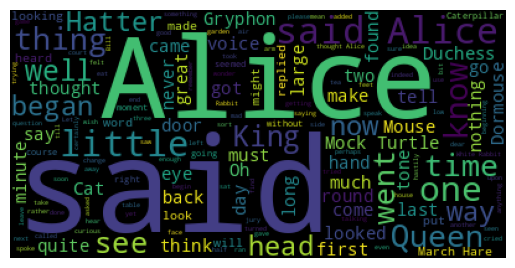

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud().generate(doc_alice)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

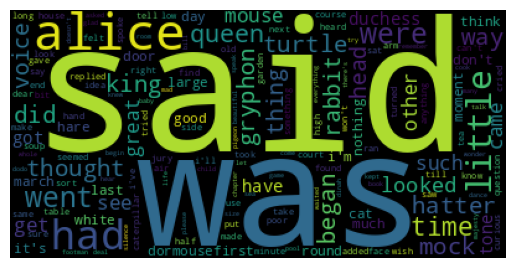

In [ ]:
wc = wordcloud.generate_from_frequencies(sorted_word_count)
plt.axis('off')
plt.imshow(wc)
plt.show()

# 카운트 기반 문서표현 방법
- Bag of Words, TF-IDF

In [ ]:
# 영화 리뷰 데이터셋 로드
import nltk
nltk.download("movie_reviews")
nltk.download("punkt")

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# 데이터셋 구조 확인
from nltk.corpus import movie_reviews #위에서 다운로드 했으니까 movie_revies를 가져올 수 있음

print(f'review count: {len(movie_reviews.fileids())}') #2000개
print(f'categories of reviews: {movie_reviews.categories()}') #부정, 긍정

review count: 2000
categories of reviews: ['neg', 'pos']


In [ ]:
# BOW 카운트 백터 생성
# 수동 구현
documents = [ movie_reviews.words(fileid) for fileid in movie_reviews.fileids() ]
documents[:3]


[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...],
 ['the', 'happy', 'bastard', "'", 's', 'quick', 'movie', ...],
 ['it', 'is', 'movies', 'like', 'these', 'that', 'make', ...]]

In [ ]:
# 단어 빈도 계산
word_count = {}

for text in documents:
  for word in text:
    word_count[word] = word_count.get(word,0) + 1

sorted_features = sorted(word_count, key=word_count.get, reverse=True)
sorted_features[:10]

[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in']

In [ ]:
# 전처리 및 재계산
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

tokenizer = RegexpTokenizer("[\\w']{3,}")
english_stops = set(stopwords.words('english'))
documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
tokens = [ for doc in documents ]